## DSC478 Winter 2019

## Amy Aumpansub 

## Due Date: Feb 12th, 2019


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Change directory working and import data
os.chdir('/Users/amy_a/Desktop/dsc478/assignment/newsgroups')

## Problem 1 : K-Nearest-Neighbor (KNN) classification on Newsgroups

### Transpose and Create array for train and test Matrix ( row = docs, column = terms)

In [3]:
#Import train data (5500 terms 800 docs )
DF_Train = pd.read_table('trainMatrixModified.txt',header=None)

In [4]:
#Import test data (5500 terms 200 docs )
DF_Test = pd.read_table('testMatrixModified.txt',header=None)

In [5]:
#Transpose DF to create DT matrix (row = docs, column = terms)
DT_Train = DF_Train.T
DT_Test = DF_Test.T

In [6]:
#import classes from Train data and drop the first column
Class_Train = pd.read_table('trainClasses.txt',header=None)
Label_Train = Class_Train.drop(Class_Train.columns[0], axis=1)

In [7]:
#import classes from Test data and drop the first column
Class_Test= pd.read_table('testClasses.txt',header=None)
Label_Test = Class_Test.drop(Class_Test.columns[0], axis=1)

In [8]:
# Convert all frames to array
DT_Train = np.array(DT_Train)
DT_Test = np.array(DT_Test)
Label_Train = np.array(Label_Train)
Label_Test = np.array(Label_Test)

## a. Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [9]:
## KNN classifier function
## passing 5 inputs 
## where D is data Matrix, L is Train Label, x is instance, K is # nearest neighbors, Measure is type of distance

def knn_classifier(D, L, x, K, Measure):
    #Euclidean Distance
    if Measure == 0:
        dist = np.sqrt(((D - x)**2).sum(axis=1))
    #Cosine Similarity
    elif Measure == 1:
         normX = np.linalg.norm(x)
         normD = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
         CosSim = np.dot(D,x)/(normX * normD)
         dist = 1 - CosSim
    #sorting by distant
    idx = np.argsort(dist)
    #count and return majority vote
    Target_0 = 0
    Target_1 = 0
    for i in range(K):
        if L[idx[i]] == 0:
            Target_0  += 1 
        else:
            Target_1  += 1
    if Target_0 > Target_1:
        PredictedClass = 0
    else:
        PredictedClass = 1
    #print ("Total Votes for Class 0: ",Target_0,"\nTotal Votes for Class 1: ",Target_1)
    return idx[:K], PredictedClass
            

### Test function with x = DT_Test[10], k = 5, measure = 1 (Cosine Similarity)

In [10]:
KNN_idx, Predicted_Result = knn_classifier(DT_Train, Label_Train, DT_Test[10], 5, 1)

In [11]:
print("The Predicted Class is : ", Predicted_Result)
print("The Top K Neighbors index : ", KNN_idx)
#print("The Top K Neighbors values : ", DT_Train[KNN_idx])

The Predicted Class is :  0
The Top K Neighbors index :  [733 271 722 779 325]


## b. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [12]:
def KNN_Accuracy(D, L, L_test, x, K, Measure):
    accuracyCounter = 0.0
    totalTest = len(L_test)
    for i in range (totalTest):
        KNN_idx, Predicted_Result = knn_classifier(D, L, x[i,:], K, Measure)
        if (Predicted_Result == L_test[i]):
            accuracyCounter += 1
    return (accuracyCounter/totalTest)

## c. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [13]:
TotalRate = np.zeros((20,3), dtype=float)
for i in range (0,20):
    k = i+1
    AccuracyRate_Euc = KNN_Accuracy(DT_Train, Label_Train, Label_Test, DT_Test, k, 0)
    AccuracyRate_Cos = KNN_Accuracy(DT_Train, Label_Train, Label_Test, DT_Test, k, 1)
    TotalRate[i] = [k, AccuracyRate_Euc, AccuracyRate_Cos]


### Summary of Accuracy Rates, where k = (1 to 20)

In [14]:
Table = pd.DataFrame(TotalRate)
Table.columns = ["K", "Euclidean", "Cosine Similarity"]
Table

,K,Euclidean,Cosine Similarity
0,1.0,0.780,0.985
1,2.0,0.675,0.980
2,3.0,0.810,0.970
3,4.0,0.770,0.980
4,5.0,0.815,0.970
5,6.0,0.835,0.975
6,7.0,0.765,0.980
7,8.0,0.800,0.975
8,9.0,0.750,0.975
9,10.0,0.860,0.985


- For each K, the KNN model using Cosine Similarity has more stable and higher accuracy rates than the model using Euclidean Distant. An averaged accuracy rate of Cosine Similarity is 97.85 %, while averaged accuracy rate of Euclidean is 78.67 %. 
- The maximum rate of Cosine Similarity is 98.5 % when k = (1, 9, 13, 14, 15)
- The maximum rate of Euclidean Distant is 86.0 % when k = 10
- The accuracy rates of Euclidean Distant are more volatile over the ranges of k

## d. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [15]:
#Import train and test data (5500 terms 800 docs )
TD_Train = pd.read_table('trainMatrixModified.txt',header=None)
TD_Test = pd.read_table('testMatrixModified.txt',header=None)

#### Note: There is a warning when spearately converting training and testing data to TFxIDF weights
#### So, I need to combine the data and convert all data to TFxIDF weights before resplitting data into Train/Test sets

In [16]:
TD = np.concatenate((TD_Train, TD_Test), axis=1)
numTerms=TD.shape[0]
NDocs = TD.shape[1]

In [17]:
termFreqs = TD.sum(axis=1)
DF = np.array([(TD!=0).sum(1)]).T

In [18]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)

In [19]:
IDF = np.log2(np.divide(NMatrix, DF))

In [20]:
print (IDF)

[[3.94 3.94 3.94 ... 3.94 3.94 3.94]
 [7.16 7.16 7.16 ... 7.16 7.16 7.16]
 [6.51 6.51 6.51 ... 6.51 6.51 6.51]
 ...
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]]


In [21]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [22]:
pd.set_option("display.precision", 2)

TD_tfidf

array([[ 7.89,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [14.32,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.01,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

### Transpose TFxIDF Matrix and Split to Train 80% Test 20%

In [23]:
TFxIDF_DT= TD_tfidf.T

In [24]:
TFxIDF_Train = TFxIDF_DT[0:800,]
TFxIDF_Test = TFxIDF_DT[800:]
TFxIDF_Train.shape

(800, 5500)

In [25]:
NewTotalRate= np.zeros((20,3), dtype=float)
for i in range (0,20):
    k = i+1
    NewAccuracyRate_Euc = KNN_Accuracy(TFxIDF_Train, Label_Train, Label_Test, TFxIDF_Test, k, 0)
    NewAccuracyRate_Cos = KNN_Accuracy(TFxIDF_Train, Label_Train, Label_Test, TFxIDF_Test, k, 1)
    NewTotalRate[i] = [k, NewAccuracyRate_Euc, NewAccuracyRate_Cos]

### Summary of New Accuracy Rates for TFxIDF weights , where k = (1 to 20)

In [26]:
TableNew = pd.DataFrame(NewTotalRate)
TableNew.columns = ["K", "Euclidean", "Cosine Similarity"]
TableNew

,K,Euclidean,Cosine Similarity
0,1.0,0.72,0.95
1,2.0,0.60,0.94
2,3.0,0.74,0.97
3,4.0,0.62,0.96
4,5.0,0.81,0.97
5,6.0,0.83,0.97
6,7.0,0.73,0.98
7,8.0,0.74,0.98
8,9.0,0.69,0.99
9,10.0,0.74,0.97


**After using TFxIDF weights**
- For each K, the KNN model with new TFxIDF weights has higher accuracy rates than the model using raw frequency   data.
- The accuracy rates of Euclidean Distant are still more volatile than Cosine Similarity over the ranges of k

## Problem 2: Classification using scikit-learn [Dataset: bank_data.csv]

In [27]:
import os
#Change directory working and import data
os.chdir('/Users/amy_a/Desktop/dsc478/assignment')

In [28]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit- learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%- 20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [29]:
#Import bank data
BankData = pd.read_csv('bank_data.csv')

In [30]:
BankData.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [31]:
#Separate the Y target attribute ("pep") from data
BankTarget = BankData.pep
BankTarget.head(5)

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [32]:
#Save only X attributes 
BankFeatures = BankData.drop("pep", axis=1)
BankFeatures = BankFeatures.drop("id", axis=1)
BankFeatures.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [33]:
#Create dummy variables
BankNum = pd.get_dummies(BankFeatures, columns = ["gender","region", "married","car","savings_acct","current_acct","mortgage"])

In [34]:
#Spliting data into Train and Test (80%, 20%)
from sklearn.model_selection import train_test_split
Bank_train, Bank_test, Bank_target_train, Bank_target_test = train_test_split(BankNum, BankTarget, test_size=0.2, random_state=33)

In [35]:
print (Bank_test.shape)
print (Bank_train.shape)

(120, 19)
(480, 19)


In [36]:
Bank_train.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,46,32583.5,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
86,25,15525.0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
83,35,16394.4,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
523,34,16291.0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1


## b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results)

In [37]:
#Normalize data
from sklearn import preprocessing

#### Min - Max Normalization

In [38]:
min_max_scaler = preprocessing.MinMaxScaler().fit(Bank_train)
Bank_train_norm = min_max_scaler.transform(Bank_train)
min_max_scaler = preprocessing.MinMaxScaler().fit(Bank_test)
Bank_test_norm = min_max_scaler.transform(Bank_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
Bank_train_norm[0:5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [40]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
Bank_test_norm[0:5]

array([[0.29, 0.15, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.84, 0.45, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.88, 0.67, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.71, 0.8 , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.96, 0.6 , 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

#### Perform KNN Classification

In [41]:
#Perform KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [42]:
# K = 5
Bank_KNN = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
Bank_KNN.fit(Bank_train_norm, Bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
Predict_test = Bank_KNN.predict(Bank_test_norm)
Predict_test

array(['YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO'], dtype=object)

#### KNN Classification Report 

In [44]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Bank_target_test, Predict_test))
print("Accuracy Rate (Test)",Bank_KNN.score(Bank_test_norm, Bank_target_test))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

   micro avg       0.64      0.64      0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120

Accuracy Rate (Test) 0.6416666666666667


#### KNN Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = Bank_target_test, y_pred = Predict_test)
print(knn_confusion_matrix)

[[46 20]
 [23 31]]


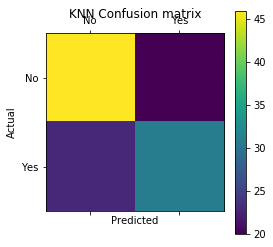

In [46]:
#Create graph
plt.matshow(knn_confusion_matrix)
plt.title('KNN Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

#### Experiment using different  K,  Weights, and  Metric

In [47]:
# K = 7, distance, euclidean
Bank_KNN2 = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='euclidean')
Bank_KNN2.fit(Bank_train_norm, Bank_target_train)
print(classification_report(Bank_target_test, Predict_test))
print("Accuracy Rate (Test)",Bank_KNN2.score(Bank_test_norm, Bank_target_test))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

   micro avg       0.64      0.64      0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120

Accuracy Rate (Test) 0.65


In [48]:
# K = 7, distance, Uniform, Manhattan
Bank_KNN3 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric='manhattan')
Bank_KNN3.fit(Bank_train_norm, Bank_target_train)
print(classification_report(Bank_target_test, Predict_test))
print("Accuracy Rate (Test)",Bank_KNN3.score(Bank_test_norm, Bank_target_test))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

   micro avg       0.64      0.64      0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120

Accuracy Rate (Test) 0.6166666666666667


In [49]:
# K = 9, distance, euclidean
Bank_KNN4 = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric='euclidean')
Bank_KNN4.fit(Bank_train_norm, Bank_target_train)
print(classification_report(Bank_target_test, Predict_test))
print("Accuracy Rate (Test)",Bank_KNN4.score(Bank_test_norm, Bank_target_test))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

   micro avg       0.64      0.64      0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120

Accuracy Rate (Test) 0.65


In [50]:
# K = 8, unioform, manhattan
Bank_KNN5 = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', metric='manhattan')
Bank_KNN5.fit(Bank_train_norm, Bank_target_train)
print(classification_report(Bank_target_test, Predict_test))
print("Accuracy Rate (Test)",Bank_KNN5.score(Bank_test_norm, Bank_target_test))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

   micro avg       0.64      0.64      0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120

Accuracy Rate (Test) 0.6583333333333333


#### Summary of Experiment

- As k increases from 5 to 8, the averaged accuracy rate gradually increases from 64.1% to 65.8%.
- As k = 9, the accuracy rate decreases to 65%.
- The accuracy rate of using manhattan metric is slightly lower than the rate using Euclidean.
- The accuracy rate for predicting class "Yes", and "No" are comparable.
- Overall, the KNN model provides a moderate accuracy for prediction.


## c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade- off ?

### Decision Tree ( Default )

In [51]:
from sklearn.tree import DecisionTreeClassifier
Bank_Tree = DecisionTreeClassifier(random_state = 9)
Bank_Tree.fit(Bank_train_norm, Bank_target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=9,
            splitter='best')

In [52]:
Predict_tree = Bank_Tree.predict(Bank_test_norm)

#### Decision Tree ( Classification Report )

In [53]:
print(classification_report(Bank_target_test, Predict_tree))
print("Accuracy Rate (Test)",Bank_Tree.score(Bank_test_norm, Bank_target_test))
print("Accuracy Rate (Train)",Bank_Tree.score(Bank_train_norm, Bank_target_train))

              precision    recall  f1-score   support

          NO       0.81      0.82      0.81        66
         YES       0.77      0.76      0.77        54

   micro avg       0.79      0.79      0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120

Accuracy Rate (Test) 0.7916666666666666
Accuracy Rate (Train) 1.0


#### Decision Tree ( Confusion Matrix )

In [54]:
from sklearn.metrics import confusion_matrix
Tree_confusion_matrix = confusion_matrix(y_true = Bank_target_test, y_pred = Predict_tree)
print(Tree_confusion_matrix)

[[54 12]
 [13 41]]


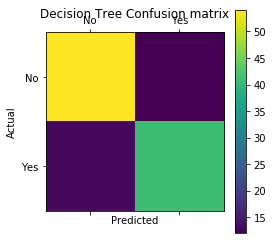

In [55]:
#Create graph
plt.matshow(Tree_confusion_matrix)
plt.title('Decision Tree Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

### Naive Bayes (Gaussian)

In [56]:
from sklearn import naive_bayes
Bank_NB = naive_bayes.GaussianNB()
Bank_NB.fit(Bank_train_norm, Bank_target_train)
Predict_NB = Bank_NB.predict(Bank_test_norm)

#### Naive Bayes Classification Report

In [57]:
print(classification_report(Bank_target_test, Predict_NB))
print("Accuracy Rate (Test)",Bank_NB.score(Bank_test_norm, Bank_target_test))
print("Accuracy Rate (Train)",Bank_NB.score(Bank_train_norm, Bank_target_train))

              precision    recall  f1-score   support

          NO       0.63      0.67      0.65        66
         YES       0.56      0.52      0.54        54

   micro avg       0.60      0.60      0.60       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.60      0.60      0.60       120

Accuracy Rate (Test) 0.6
Accuracy Rate (Train) 0.6708333333333333


#### Naive Bayes Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
NB_confusion_matrix = confusion_matrix(y_true = Bank_target_test, y_pred = Predict_NB)
print(NB_confusion_matrix)

[[44 22]
 [26 28]]


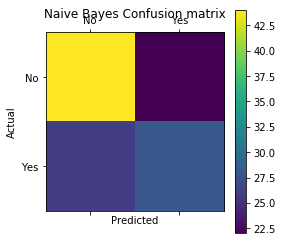

In [59]:
#Create graph
plt.matshow(NB_confusion_matrix)
plt.title('Naive Bayes Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

## d.  Discuss your observations based on the above experiments

- From the above outputs, the Naive Bayes classifier has a lower average accuracy rate than that of KNN and decision tree.
- The average accuracy rate of Naive Bayes is about 60%, while that of Decision Tress is as high as 79% (using default parameters)
- The average accuracy rate of Naive Bayes for train set of 67% is relatively higher than that of test set (60%), implying that the model can be overfitting.
- For decision tree model, when we change some parameters, the accuracy rate also changes. The Tree model has an accuracy rate for 100% using train set and 79% using test set. This indicates the problem of overfitting the training data. It may be caused by noise or outlier that make the tree have too many branches (high variance)
- The KNN also have different accuracy rates when we change the parameter. The accuracy rate increases from k = 5 to k = 8. Then, it starts to decreases.
- All experiments above show the evidence of Bias–variance tradeoff in which when we have high variance, it will cause overfitting. While when we have high bias, it will cause an underfitting. The error could come from that the naive bayes makes an assumption of normal distribution, which may not capture the nature of data.
- Thus, for Bias–variance tradeoff, it is important to select the optimal model complexity that is not too simple (high bias) or too complex (high varance). The optimal model should provide the high accuracy rate for both test and training set.

## Problem 3. Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv] For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed. Your tasks in this problem are the following:

## a. Preprocessing and data analysis :

### • Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.¶

In [1]:
import os
#Change directory working and import data
os.chdir('/Users/amy_a/Desktop/dsc478/assignment')

In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
adult_Data = pd.read_csv('adult-modified.csv', na_values=['?'])

In [4]:
adult_Data.head(5)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [5]:
adult_Data.dtypes

age               float64
workclass          object
education           int64
marital-status     object
race               object
sex                object
hours-per-week      int64
income             object
dtype: object

In [6]:
adult_Data.shape

(10000, 8)

In [7]:
adult_Data.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [8]:
adult_Data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [9]:
#Check the missing value for numerics
adult_Data[adult_Data.age.isnull()] 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
89,NaN,Public,16,Single,White,Female,50,>50K
95,NaN,Public,10,Single,White,Male,50,<=50K
113,NaN,Private,10,Married,White,Female,25,<=50K
132,NaN,Self-emp,9,Married,White,Male,35,<=50K
147,NaN,Private,9,Married,White,Female,24,<=50K


#### Fill the missing ages with the mean age

In [10]:
#Filling in the missing value with Mean attribute
meanAge = adult_Data.age.mean()

In [11]:
adult_Data.age.fillna(meanAge, axis=0, inplace=True)
adult_Data.shape
adult_Data[adult_Data.age.isnull()] 

,age,workclass,education,marital-status,race,sex,hours-per-week,income


#### Drop the missing values for categorical attributes

In [12]:
adult_Data.dropna(axis=0, inplace=True) 
adult_Data.shape

(9412, 8)

#### Check if data still have missing values

In [13]:
adult_Data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

### Data is now clean ( No missing values )

### • Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [14]:
#Basic Statistics for Numeric attributes
adult_Data[['age','education','hours-per-week']].describe()


,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


### Numerical Attributes

#### The distribtions of numeric attributes

- There are 3 Numeric Attributes: age, education, and hours per week
- The statistics are shown above. The range of ages is 18 - 90 years old. The age has the mean of 38.36 years which are closed to the median of 37 years. The standard deviation of age is 12.96 years.
- The education ranges from 16 (max) to 1 (min). The education has the mean of 10.12 and the median of 10, we will further examine the histogram of education below. The standard deviation of education is 2.5.
- The range of hours-per-week is 1 to 99 children. The hours-per-week has the mean of 41.08 closed to the median of 40. The standard deviation of hours-per-week is 11.88  We will further examine the distribution from the histogram in the later part.

Text(0.5, 0, 'Age')

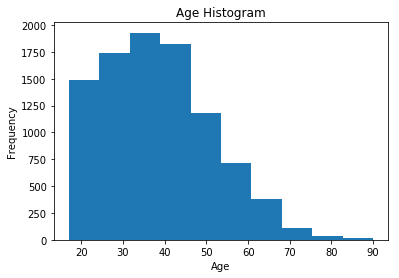

In [15]:
age_hist = adult_Data['age'].plot(kind="hist")
plt.title('Age Histogram')
plt.xlabel('Age')

- The age distribution is right-skewed, so most people have age less than the median of 37 and the mean of 38.36.

Text(0.5, 0, 'Education')

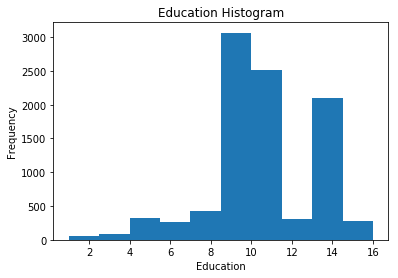

In [16]:
edu_hist = adult_Data['education'].plot(kind="hist")
plt.title('Education Histogram')
plt.xlabel('Education')

- The education distribution has several high peaks, but most people have education between 8.5 and 10 years

Text(0.5, 0, 'Hours per Week')

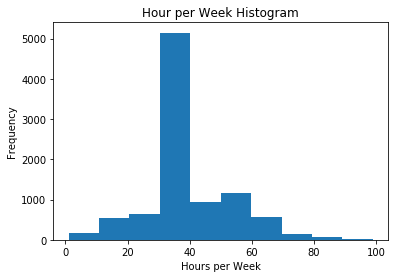

In [17]:
hour_hist = adult_Data['hours-per-week'].plot(kind="hist")
plt.title('Hour per Week Histogram')
plt.xlabel('Hours per Week')

- From the histogram, most people work about 30 to 40 hours per week, with the maximum of 99 hours per week.

### Categorical Attributes

In [18]:
adult_Data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

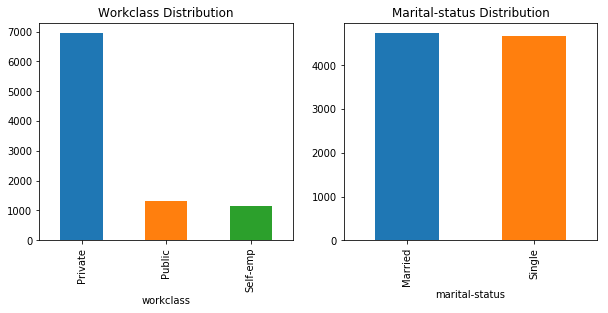

In [19]:
temp1 = adult_Data['workclass'].value_counts()
temp2 = adult_Data['marital-status'].value_counts()

#Create bar chart for categorical variables
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('workclass')
ax1.set_title("Workclass Distribution")
temp1.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('marital-status')
ax1.set_title("Marital-status Distribution")
temp2.plot(kind='bar', grid = False)

- The majority of adults have private work class (6947 adults)
- There are an almost equal number of married and single adults

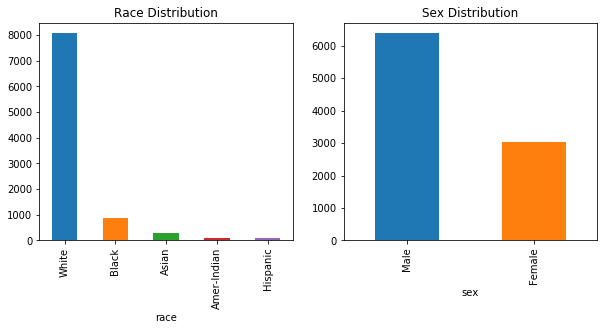

In [20]:
temp3 = adult_Data['race'].value_counts()
temp4 = adult_Data['sex'].value_counts()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('race')
ax1.set_title("Race Distribution")
temp3.plot(kind='bar', grid = False)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('sex')
ax1.set_title("Sex Distribution")
temp4.plot(kind='bar', grid = False)

- The majority of adults are white.
- The majority of adults are Amer-Indian and Hispanic.
- There are more male than female adults in this dataset.

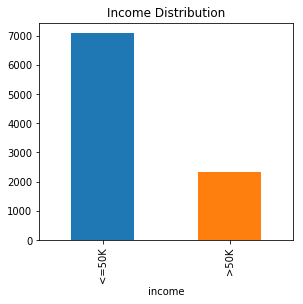

In [21]:
temp5 = adult_Data['income'].value_counts()

#Create bar chart for categorical variables
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('income')
ax1.set_title("Income Distribution")
temp5.plot(kind='bar', grid = False)

- The majority of adults have income less than or equal to 50K, so we have imbalanced classes

### • Perform the following cross-tabulations (including generating bar charts): education+race, work- class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [22]:
er = pd.crosstab(adult_Data["education"], adult_Data["race"])
er

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


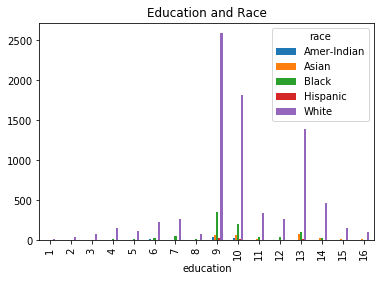

In [23]:
#Plot graph between edu and race
plt.show(er.plot(kind="bar", title="Education and Race"))

- From the bar chart, we can notice that white adult has higher education level than other races.
- Majority of adults have education in level 9, 10, 13, respectively. This means that majority of people have  high school degree (level 9)
- In the highest level of education (level 16), there are no Amer-Indian and Hispanic adults

In [24]:
wi = pd.crosstab(adult_Data["workclass"], adult_Data["income"])
wi

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


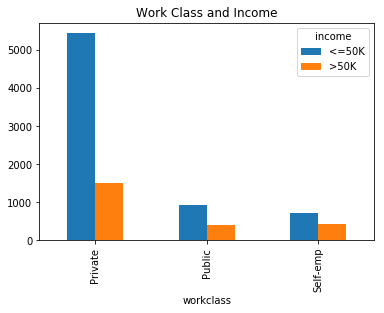

In [25]:
plt.show(wi.plot(kind="bar", title="Work Class and Income"))

- From the bar chart, the majority of adult who works in private class has income less than or equal to 50K.
- In private work class, adults tend to earn less than or equal to 50K.
- In every work class, there are lower numbers of adults who earn more than 50K.

In [26]:
wr = pd.crosstab(adult_Data["workclass"], adult_Data["race"])
wr

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


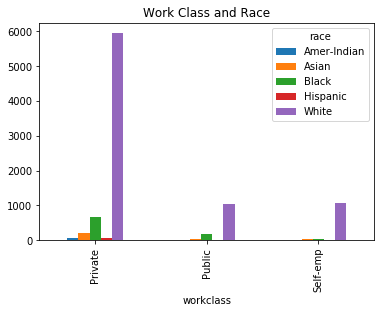

In [27]:
plt.show(wr.plot(kind="bar", title="Work Class and Race"))

- From the bar chart, the white adults dominate in every work class.
- Private work class contains the majority of adults from every race.
- For Amer-Indian, Asian, and Black, there are lowest number of adults in the self-employed class.

In [28]:
ri = pd.crosstab(adult_Data["race"], adult_Data["income"])
ri

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [29]:
rip = ri.apply(lambda r: r/r.sum()*100, axis=1)
rip

income,<=50K,>50K
race,,
Amer-Indian,90.217391,9.782609
Asian,76.975945,23.024055
Black,86.659193,13.340807
Hispanic,92.000000,8.000000
White,73.728603,26.271397


- From the crosstab table and graph, we can observe that the majority of adults in all races have an income less than or equal to 50 K
- The adults within low income (<=50K) class is significantly dominant. 
- For example, there are over 90% for adults from Hispanic and Amer-Indian have lower income.
- While there are higher percentage of white and asian adults who earn high income (> 50K), accounting for 26% of total White adults and 23% of the total Asian adults.

## • Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [30]:
temp6 = adult_Data.groupby("income").describe()
temp6.stack()

age    education  hours-per-week
income                                                
<=50K  count  7093.000000  7093.000000     7093.000000
       mean     36.644604     9.646976       39.567038
       std      13.340142     2.397358       11.868506
       min      17.000000     1.000000        1.000000
       25%      26.000000     9.000000       38.000000
       50%      35.000000     9.000000       40.000000
       75%      45.000000    10.000000       40.000000
       max      90.000000    16.000000       99.000000
>50K   count  2319.000000  2319.000000     2319.000000
       mean     43.632531    11.588185       45.708495
       std      10.042135     2.410764       10.678794
       min      19.000000     2.000000        1.000000
       25%      36.000000     9.000000       40.000000
       50%      43.000000    12.000000       40.000000
       75%      50.000000    13.000000       50.000000
       max      90.000000    16.000000       99.000000

In [31]:
adult_Data.groupby("income").mean()

,age,education,hours-per-week
income,,,
<=50K,36.644604,9.646976,39.567038
>50K,43.632531,11.588185,45.708495


- The low income category has the lower average age, lower education level, and the lower number of hours per week.
- On the other hand, the high inocme category jave a higher average age of 43, the higher average education level of 11, and the greater number of hours per weeks of 45.7. 

In [32]:
adult_Data.groupby(["income","workclass"])["workclass"].count()

income  workclass
<=50K   Private      5443
        Public        925
        Self-emp      725
>50K    Private      1504
        Public        392
        Self-emp      423
Name: workclass, dtype: int64

In [33]:
adult_Data.groupby(['income','marital-status'])['marital-status'].count()

income  marital-status
<=50K   Married           2730
        Single            4363
>50K    Married           2007
        Single             312
Name: marital-status, dtype: int64

In [34]:
adult_Data.groupby(['income','sex'])['sex'].count()

income  sex   
<=50K   Female    2669
        Male      4424
>50K    Female     360
        Male      1959
Name: sex, dtype: int64

In [35]:
adult_Data.groupby(['income','race'])['race'].count()

income  race       
<=50K   Amer-Indian      83
        Asian           224
        Black           773
        Hispanic         69
        White          5944
>50K    Amer-Indian       9
        Asian            67
        Black           119
        Hispanic          6
        White          2118
Name: race, dtype: int64

### summary of the income and other attributes

- The low income category has the lower average age, lower education level, and the lower number of hours per week.
- The majority of people who works in private class are in the low-income group.
- The majority of adults who earn a high income (>50K) are male.
- For all races, there are higher number of adults who earn less than <=50. 
- The dominant race in the high-income group is White. 

## B. Predictive Modeling and Model Evaluation :¶

## • Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [36]:
adult_df = pd.get_dummies(adult_Data)
adult_df.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [37]:
adult_features = adult_df.drop(['income_<=50K','income_>50K'], axis=1, inplace = False)
adult_features.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [38]:
adult_target = adult_df['income_>50K']
adult_target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

## • Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross- validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

### Naive Bayes (Gaussian)

In [39]:
from sklearn import naive_bayes 
from sklearn.model_selection import cross_val_score

adult_NB = naive_bayes.GaussianNB()
adult_NB = adult_NB.fit(adult_features, adult_target)

Cscore = cross_val_score(adult_NB, adult_features, adult_target, cv=10)
Cscore
print("Overall Accuracy Rate, using 10-fold Cross Validation: %0.2f (+/- %0.2f)" % (Cscore.mean(), Cscore.std() * 2))

Overall Accuracy Rate, using 10-fold Cross Validation: 0.72 (+/- 0.02)


### Decision Tree

In [40]:
from sklearn.tree import tree
from sklearn.model_selection import cross_val_score

adult_Tree = tree.DecisionTreeClassifier(criterion='entropy',random_state=9)
adult_Tree = adult_Tree.fit(adult_features, adult_target)

CscoreT = cross_val_score(adult_Tree, adult_features, adult_target, cv=10)
CscoreT
print("Overall Accuracy Rate, using 10-fold Cross Validation: %0.2f (+/- %0.2f)" % (CscoreT.mean(), CscoreT.std() * 2))

Overall Accuracy Rate, using 10-fold Cross Validation: 0.77 (+/- 0.03)


### Linear Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

adult_LDA = LinearDiscriminantAnalysis()
adult_LDA = adult_LDA.fit(adult_features, adult_target)

CscoreL = cross_val_score(adult_LDA, adult_features, adult_target, cv=10)
CscoreL
print("Overall Accuracy Rate, using 10-fold Cross Validation: %0.2f (+/- %0.2f)" % (CscoreL.mean(), CscoreL.std() * 2))

Overall Accuracy Rate, using 10-fold Cross Validation: 0.81 (+/- 0.02)


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

**Summary of Overall Accuracy**
- For Naive Bayes: Overall Accuracy Rate, using 10-fold Cross Validation: 0.72
- For Decision Tree: Overall Accuracy Rate, using 10-fold Cross Validation: 0.77
- For LDA: Overall Accuracy Rate, using 10-fold Cross Validation: 0.81
The LDA has the highest accuracy rate and the Naive Bayes has the lowest accuracy rate

## • For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook

### Notes: The full tree is big, please find the attached Tree.png for more details

In [45]:
from sklearn.tree import tree
adult_Tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=9)
adult_Tree = adult_Tree.fit(adult_features, adult_target)

In [46]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(adult_Tree,out_file='tree3.dot', feature_names= adult_features.columns, class_names=["income<=50K","income_>50K"])

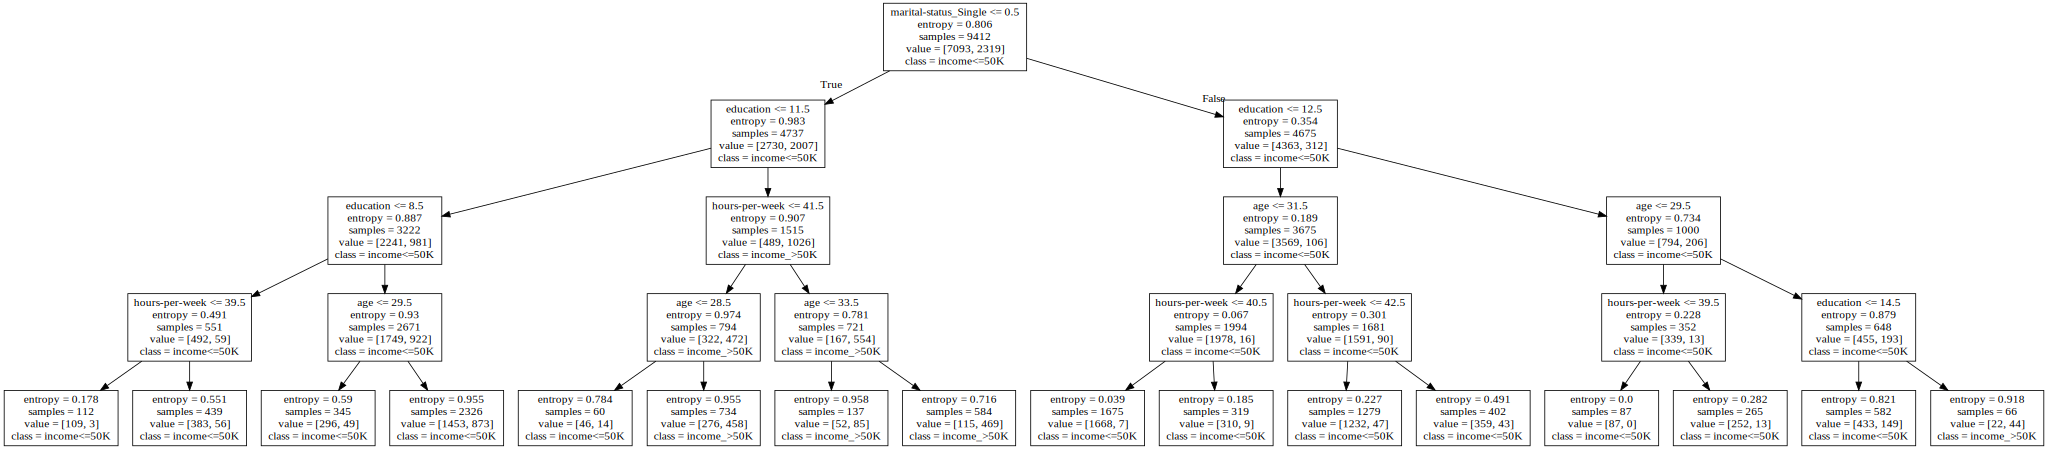

In [47]:
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)